In [4]:
# 장소특징에 따른 데이터 분석
import bikes_data # C:\Users\USER\Documents\GitHub\MS_AI_Python\notebooks\0628_BIKES\bikes_data.py 임포트

bikes = bikes_data.data_preprocessing() # 그 안에 함수 호출
bikes.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,일자,대여시간대,주말구분,대여구,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,3,8,평일,동대문구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,3,8,평일,성동구,37.563511,127.056725
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수,5,8,평일,동대문구,37.561966,127.064506


## 1. 대여구 별 이용건수

In [10]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리', '요일', '일자', '대여시간대', '주말구분', '대여구',
       '대여점위도', '대여점경도'],
      dtype='object')

In [19]:
구별이용건수 = bikes.pivot_table(index='대여구',values='자전거번호', aggfunc='count')\
                .sort_values(by='자전거번호', ascending=True).reset_index()
                # 인덱스 없애기.. 어떤 이유로
구별이용건수.head(10)

,대여구,자전거번호
0,금천구,33650
1,도봉구,37810
2,중구,38733
3,강북구,38901
4,용산구,47993
5,중랑구,53107
6,동작구,54393
7,은평구,58874
8,서대문구,60415
9,양천구,64912


<Axes: title={'center': '대여구별 이용건수'}, ylabel='대여구'>

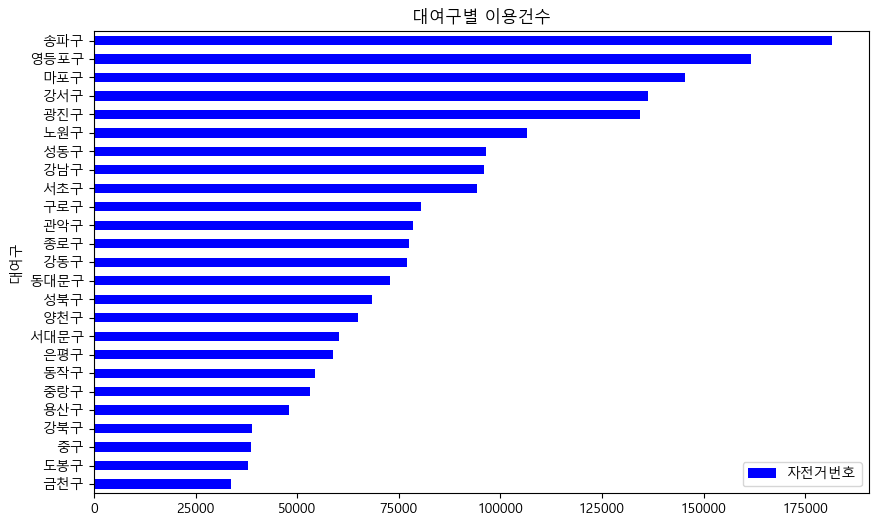

In [18]:
구별이용건수.plot(kind='barh', title='대여구별 이용건수', figsize=(10,6), color='b')

In [23]:
# 구별 위도 경도 json 파일 불러오기
# C:\Users\USER\Documents\GitHub\MS_AI_Python\notebooks\0628_BIKES\data\Seoul_Gu.json 파일로
import json
import folium

with open("data\Seoul_Gu.json", "r") as f:
    seoul_data = json.load(f)


<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\USER\AppData\Local\Temp\ipykernel_6464\3239545789.py:6: SyntaxWarning: invalid escape sequence '\S'
  with open("data\Seoul_Gu.json", "r") as f:


In [21]:
seoul_data['features'][0]['properties']

{'SIG_CD': '11110', 'SIG_ENG_NM': 'Jongno-gu', 'SIG_KOR_NM': '종로구'}

In [26]:
# 지도의 중심위치 지정
map1 = folium.Map(location=[bikes['대여점위도'].mean(), bikes['대여점경도'].mean()],
           zoom_start=11) # 위도경도를 기준으로 하겠다.
map1

In [29]:
folium.Choropleth(
    geo_data=seoul_data,
    data =구별이용건수,
    columns=['대여구','자전거번호'],
    fill_color='YlGnBu', #문자열 상수로 컬러 입력
    key_on='feature.properties.SIG_KOR_NM').add_to(map1)

In [30]:
map1

# 2. 대여구별 이용시간 평균

   대여구       이용시간
0  강서구  23.116492
1  성북구  23.183428
2  종로구  23.256120


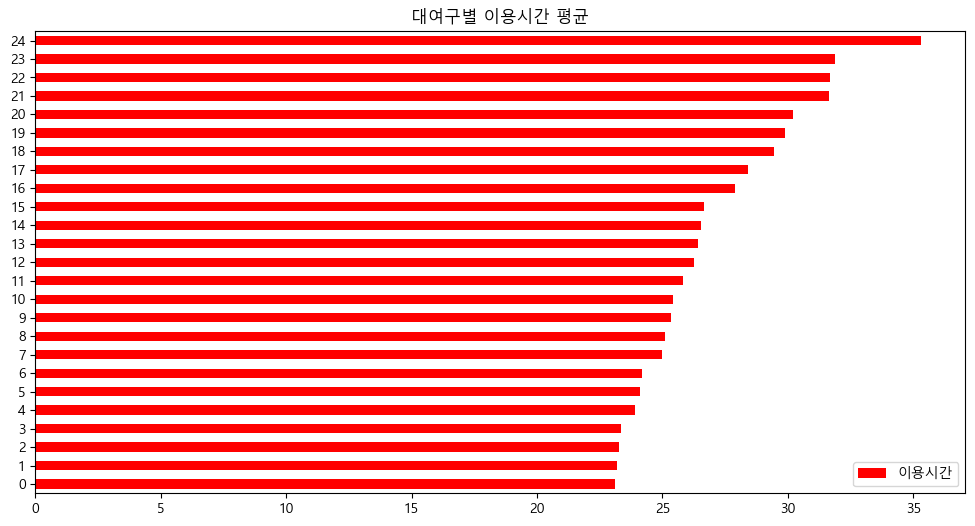

In [33]:
# 이용시간으로 피벗테이블 사용


import pandas as pd

# 자전거 데이터에 대한 피벗 테이블 만들기
구별이용시간평균 = bikes.pivot_table(index='대여구', values='이용시간', aggfunc='mean')
# 피벗 테이블을 열별로 정렬(이미지에는 표시되지 않음)
구별이용시간평균 = 구별이용시간평균.sort_values(by='이용시간', ascending=True)
# 피벗 테이블의 인덱스 재설정
구별이용시간평균 = 구별이용시간평균.reset_index()

print(구별이용시간평균.head(3))

구별이용시간평균.plot(kind='barh', title='대여구별 이용시간 평균', figsize=(12,6),color='r')

import json
import folium

# 구별 위도 경도 json 파일 불러오기
with open("data/Seoul_Gu.json", "r") as f:
    seoul_data = json.load(f)

# 지도의 중심위치를 정한다.
lat = bikes['대여점위도'].mean()
lon = bikes['대여점경도'].mean()
center = [lat, lon]
# 계산된 좌표를 중심으로 폴륨 맵만들기
map1 = folium.Map(location=center, zoom_start=11)

# 시각화를 위한 맵 만들기
folium.Choropleth(
    geo_data=seoul_data, # 지도 데이터 파일 경로
    data=구별이용시간평균, # 시각화 할데이터 파일
    columns=['대여구', '이용시간'], # 지도 데이터와 매핑할 값, 시각화 할 변수
    fill_color='YlGnBu',
    key_on='feature.properties.SIG_KOR_NM' # feature. 데이터 파일과 매핑할 값
).add_to(map1)

# Display the map
map1


# folium.Choropleth(
#     geo_data=seoul_data,
#     data =구별이용건수,
#     columns=['대여구','자전거번호'],
#     fill_color='YlGnBu', #문자열 상수로 컬러 입력
#     key_on='feature.properties.SIG_KOR_NM').add_to(map1)